# 1. Import tools and the dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
apple_data = pd.read_csv('/Users/wanghaiyun/Desktop/project615/AppleStore.csv')

# 2. Show the format and structure and basic info of the dataset

In [3]:
apple_data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


# 3. Clean the Dataset, Remove Useless columns and Symbols.

In [5]:
#check duplications.
len(apple_data.id.unique())


7197

In [6]:
df = apple_data.drop(columns = ['Unnamed: 0','id','currency','track_name','ver','prime_genre','vpp_lic'])

In [7]:
# Remove the '+' from the rating and change dtype to int
df['cont_rating'] = (df['cont_rating']
                    .apply   (lambda x: x.replace('+',''))
                    .astype  (int))

In [8]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num
0,100788224,3.99,21292,26,4.0,4.5,4,38,5,10
1,158578688,0.00,161065,26,4.0,3.5,4,37,5,23
2,100524032,0.00,188583,2822,3.5,4.5,4,37,5,3
3,128512000,0.00,262241,649,4.0,4.5,12,37,5,9
4,92774400,0.00,985920,5320,4.5,5.0,4,37,5,45


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 10 columns):
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
cont_rating         7197 non-null int64
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(3), int64(7)
memory usage: 562.3 KB


In [10]:
df.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,7.093094,37.361817,3.707100,5.434903
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,4.329046,3.737715,1.986005,7.919593
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,4.000000,9.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,4.000000,37.000000,3.000000,1.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,4.000000,37.000000,5.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,9.000000,38.000000,5.000000,8.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,17.000000,47.000000,5.000000,75.000000


#4.check missing value and outliers

In [11]:
df.isnull().values.any() # in this case, we don't have any missing values

False

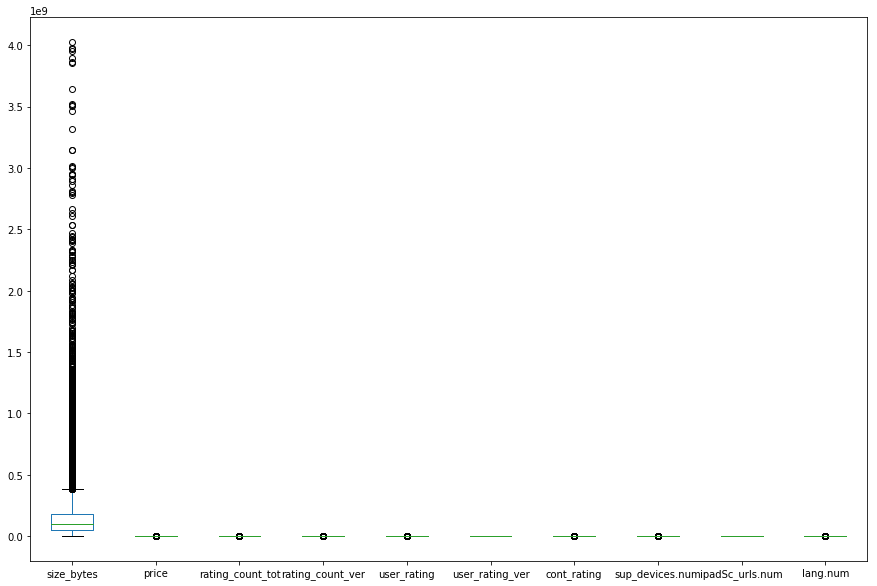

In [12]:
#use box plot to check the outliers, only size_bytes has outliers, that's normal, because apps size are radomly different
df.plot(kind='box',figsize=(15,10)) 

In [13]:
#for convenience, we changed "." to "_"
df.columns = df.columns.str.replace('.','_')

In [14]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices_num,ipadSc_urls_num,lang_num
0,100788224,3.99,21292,26,4.0,4.5,4,38,5,10
1,158578688,0.00,161065,26,4.0,3.5,4,37,5,23
2,100524032,0.00,188583,2822,3.5,4.5,4,37,5,3
3,128512000,0.00,262241,649,4.0,4.5,12,37,5,9
4,92774400,0.00,985920,5320,4.5,5.0,4,37,5,45


Text(0.5, 0, 'User rating distribution ')

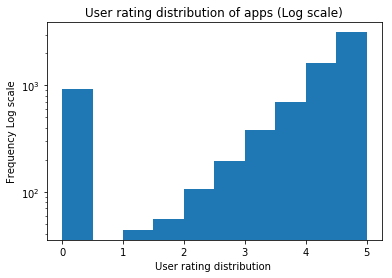

In [15]:
plt.hist(df.user_rating,log=True)
plt.title('User rating distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("User rating distribution ")

Text(0.5, 0, 'price distribution ')

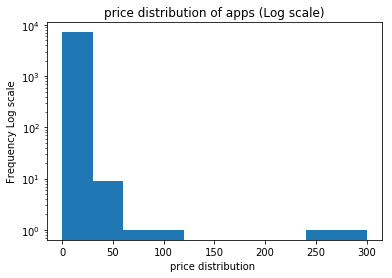

In [16]:
plt.hist(df.price,log=True)
plt.title('price distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("price distribution ")

Text(0.5, 0, 'size_bytes distribution ')

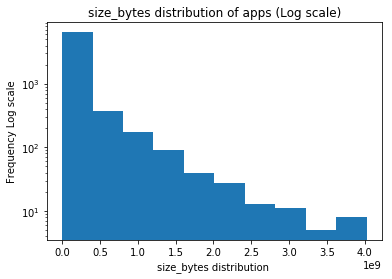

In [17]:
plt.hist(df.size_bytes,log=True)
plt.title('size_bytes distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("size_bytes distribution ")

Text(0.5, 0, 'lang_num distribution ')

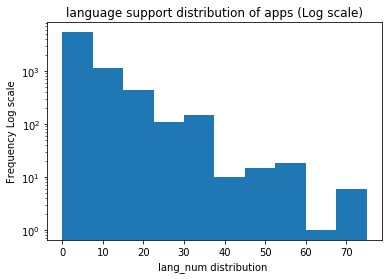

In [18]:
plt.hist(df.lang_num,log=True)
plt.title('language support distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("lang_num distribution ")

Text(0.5, 0, 'df.sup_devices_num distribution ')

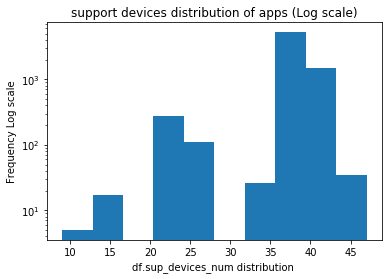

In [19]:
plt.hist(df.sup_devices_num,log=True)
plt.title('support devices distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("df.sup_devices_num distribution ")

In [20]:
#(2).Count apps in each prime_genre
apple_data['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

Text(0.5, 1.0, 'histogram of Categories')

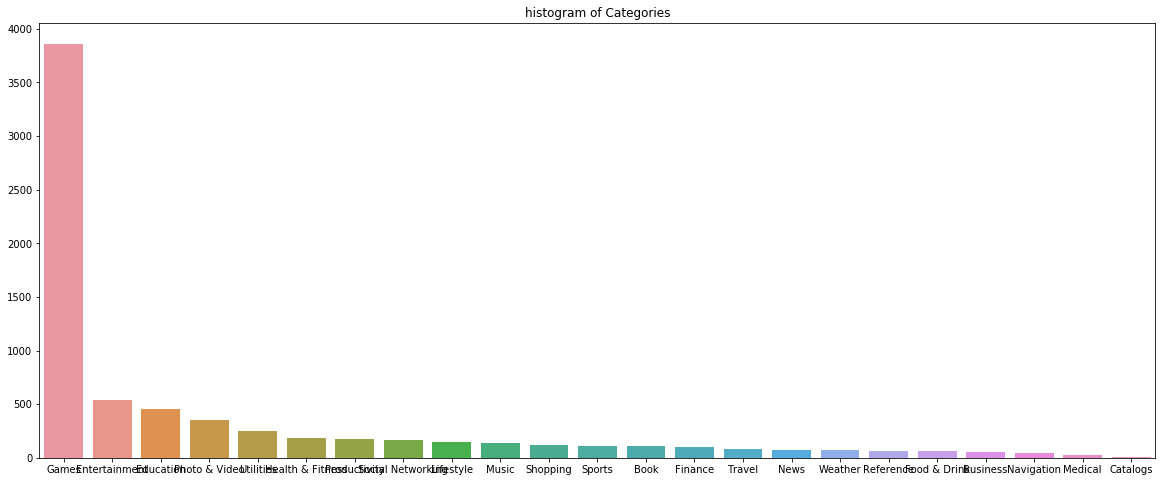

In [21]:
categories = apple_data.prime_genre.value_counts()
plt.figure(figsize=(20,8))
sns.barplot(x = categories[:24].index, y = categories[:24].values)
plt.title('histogram of Categories')
#we can see games have the highest content rating among the APPs Genre

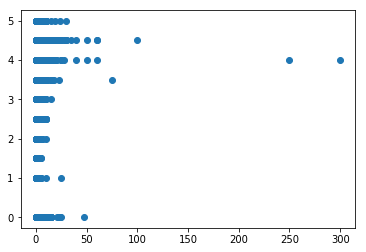

In [22]:
plt.scatter(df['price'], df['user_rating'])

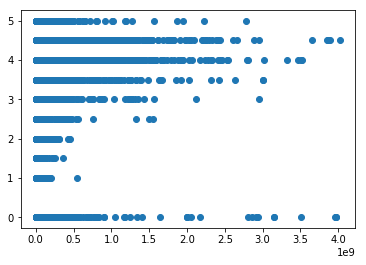

In [23]:
plt.scatter(df['size_bytes'], df['user_rating'])

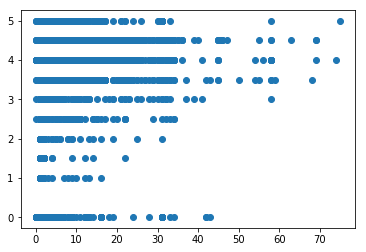

In [24]:
plt.scatter(df['lang_num'], df['user_rating'])

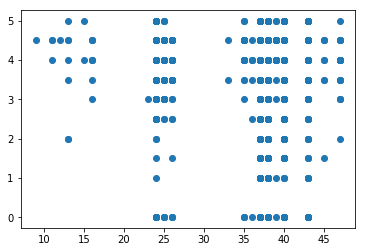

In [25]:
plt.scatter(df['sup_devices_num'], df['user_rating'])

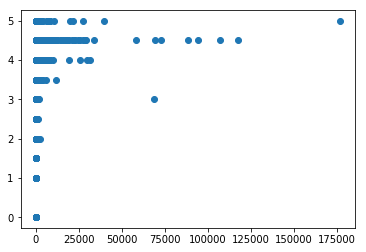

In [26]:
plt.scatter(df['rating_count_ver'],df['user_rating'])

In [27]:
genre =np.unique(apple_data['prime_genre'])
genre

array(['Book', 'Business', 'Catalogs', 'Education', 'Entertainment',
       'Finance', 'Food & Drink', 'Games', 'Health & Fitness',
       'Lifestyle', 'Medical', 'Music', 'Navigation', 'News',
       'Photo & Video', 'Productivity', 'Reference', 'Shopping',
       'Social Networking', 'Sports', 'Travel', 'Utilities', 'Weather'],
      dtype=object)

In [28]:
#(2).Count apps in each prime_genre
apple_data['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

# Normalization and standardization

In [29]:
# Separating out the features
x = features = df.iloc[:]
x.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices_num,ipadSc_urls_num,lang_num
0,100788224,3.99,21292,26,4.0,4.5,4,38,5,10
1,158578688,0.00,161065,26,4.0,3.5,4,37,5,23
2,100524032,0.00,188583,2822,3.5,4.5,4,37,5,3
3,128512000,0.00,262241,649,4.0,4.5,12,37,5,9
4,92774400,0.00,985920,5320,4.5,5.0,4,37,5,45


In [30]:
from sklearn import preprocessing
# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns = names)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
scaled_x.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices_num,ipadSc_urls_num,lang_num
0,-0.273806,0.388126,0.110902,-0.110805,0.311656,0.688921,-0.714548,0.170753,0.651051,0.576471
1,-0.112911,-0.295960,1.956477,-0.110805,0.311656,0.136202,-0.714548,-0.096808,0.651051,2.218083
2,-0.274542,-0.295960,2.319827,0.602428,-0.017759,0.688921,-0.714548,-0.096808,0.651051,-0.307474
3,-0.196620,-0.295960,3.292413,0.048117,0.311656,0.688921,1.133563,-0.096808,0.651051,0.450193
4,-0.296117,-0.295960,12.847931,1.239643,0.641071,0.965281,-0.714548,-0.096808,0.651051,4.996197


In [32]:
data = scaled_x

In [33]:
df2 = apple_data.loc[:,'prime_genre']
df2.head()

0           Games
1    Productivity
2         Weather
3        Shopping
4       Reference
Name: prime_genre, dtype: object

In [34]:
#data merge with df2
data2 = pd.concat([df2, data], axis=1, join_axes=[data.index])
data2.head()

,prime_genre,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices_num,ipadSc_urls_num,lang_num
0,Games,-0.273806,0.388126,0.110902,-0.110805,0.311656,0.688921,-0.714548,0.170753,0.651051,0.576471
1,Productivity,-0.112911,-0.295960,1.956477,-0.110805,0.311656,0.136202,-0.714548,-0.096808,0.651051,2.218083
2,Weather,-0.274542,-0.295960,2.319827,0.602428,-0.017759,0.688921,-0.714548,-0.096808,0.651051,-0.307474
3,Shopping,-0.196620,-0.295960,3.292413,0.048117,0.311656,0.688921,1.133563,-0.096808,0.651051,0.450193
4,Reference,-0.296117,-0.295960,12.847931,1.239643,0.641071,0.965281,-0.714548,-0.096808,0.651051,4.996197


#sort data by user_rating
data_sorted = data2.sort_values(by = ['user_rating'] ,ascending = False) 
data_sorted.head()

In [35]:
data.iloc[:].corr().unstack().sort_values().drop_duplicates()
#user_rating and user_rating_ver has the biggest corr wih other variables

user_rating_ver   cont_rating        -0.120357
sup_devices_num   size_bytes         -0.118347
price             sup_devices_num    -0.115361
cont_rating       ipadSc_urls_num    -0.107726
                  user_rating        -0.097999
                  lang_num           -0.069508
sup_devices_num   user_rating        -0.042451
                  lang_num           -0.041681
rating_count_tot  price              -0.039044
ipadSc_urls_num   sup_devices_num    -0.037728
price             cont_rating        -0.029666
user_rating_ver   sup_devices_num    -0.018901
price             rating_count_ver   -0.018012
lang_num          price              -0.006713
rating_count_ver  cont_rating         0.001435
size_bytes        rating_count_tot    0.004486
lang_num          size_bytes          0.004614
rating_count_ver  size_bytes          0.006337
sup_devices_num   rating_count_tot    0.008832
cont_rating       rating_count_tot    0.009139
rating_count_ver  lang_num            0.013287
rating_count_

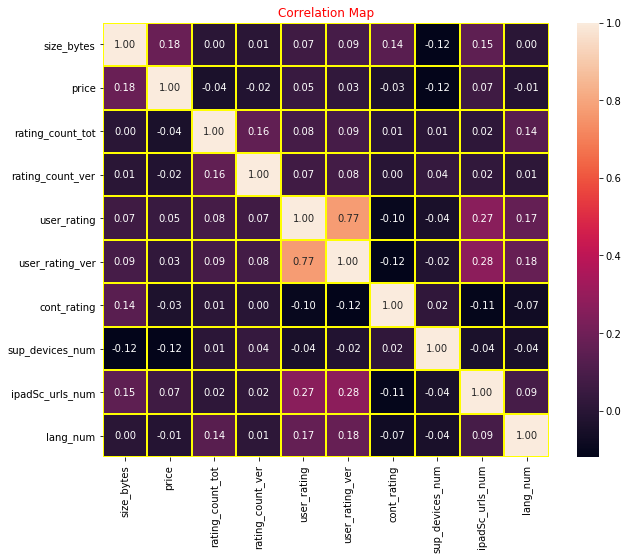

In [36]:
#correlation map 
plt.subplots(figsize=(10,8))
sns.heatmap(data.iloc[:].corr(), annot=True, linewidths=1,linecolor="yellow", fmt=".2f")
plt.title('Correlation Map',color = 'red')
plt.show()
#figsize - image size
#data.corr() - Display positive and negative correlation between columns
#annot=True -shows correlation rates
#linewidths - determines the thickness of the lines in between
#cmap - determines the color tones we will use
#fmt - determines precision(Number of digits after 0)
#if the correlation between the two columns is close to 1 or 1, the correlation between the two columns has a positive ratio.
#if the correlation between the two columns is close to -1 or -1, the correlation between the two columns has a negative ratio.
#If it is close to 0 or 0 there is no relationship between them.

PCA

In [37]:
df1 = data2.drop(columns = ['user_rating'])

In [38]:
#sort data by user_rating
df3= df1.sort_values(by = ['price'],ascending = False) 
df3.head(20)

,prime_genre,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,cont_rating,sup_devices_num,ipadSc_urls_num,lang_num
1479,Education,1.069455,51.137358,-0.169698,-0.117437,-1.798315,-0.714548,-3.575111,0.651051,-0.560030
115,Education,1.460624,42.564853,-0.160032,-0.114886,0.136202,-0.714548,-0.096808,0.651051,-0.307474
2568,Productivity,-0.258100,16.847336,-0.169302,-0.117437,-1.798315,-0.714548,-0.096808,0.651051,1.081582
162,Navigation,-0.152351,12.561083,-0.157999,-0.116672,-0.416517,-0.714548,-0.096808,-0.859625,1.965528
3238,Business,-0.376300,9.989332,-0.168919,-0.116416,0.688921,-0.714548,-0.096808,0.651051,0.829027
1136,Education,0.631393,9.989332,-0.166357,-0.084275,0.965281,-0.714548,0.170753,0.651051,-0.560030
2181,Education,-0.067924,9.989332,-0.169856,-0.117437,-1.798315,-0.714548,-3.575111,0.651051,-0.560030
5340,Business,-0.520827,8.274831,-0.167506,-0.108254,0.965281,-0.714548,-0.096808,-0.859625,-0.560030
1688,Music,2.321047,8.274831,-0.166317,-0.113100,0.688921,-0.714548,-3.575111,0.651051,-0.560030
778,Reference,0.018180,7.931931,-0.170239,-0.117437,-1.798315,0.440522,-0.096808,0.651051,-0.433752


In [39]:
# price >5

Text(0, 0.5, 'Cumulative Explained Variance')

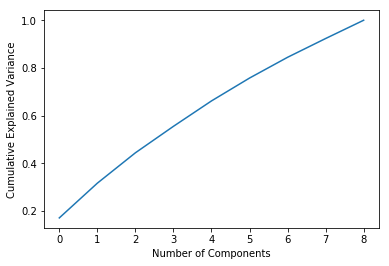

In [40]:
# Separating out the features
features = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver','user_rating_ver','cont_rating','sup_devices_num','ipadSc_urls_num','lang_num']
X = df3.loc[:,features].values
# Separating out the target value
y = data2.loc[:,['prime_genre']].values
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [41]:
X = df3.loc[:,features].values
pca = PCA(n_components = 2)
pca.fit(X)
pca_x = pca.transform(X)
print("original shape:", df3.shape)
print("transformed shape:", pca_x.shape)

original shape: (7197, 10)
transformed shape: (7197, 2)


In [42]:
pca.explained_variance_ratio_

array([0.17143204, 0.14560561])

In [43]:
pca_x = pd.DataFrame(data = pca_x, 
                     columns = ['principal component1','principal component2'])
pca_x.head(5)

,principal component1,principal component2
0,11.155896,26.971546
1,9.953838,21.375815
2,3.376280,8.021935
3,2.797072,5.467754
4,3.156011,4.328074


In [44]:
finalDf = pd.concat([pca_x, data2[['prime_genre']]], axis = 1)
finalDf.head(30)

,principal component1,principal component2,prime_genre
0,11.155896,26.971546,Games
1,9.953838,21.375815,Productivity
2,3.376280,8.021935,Weather
3,2.797072,5.467754,Shopping
4,3.156011,4.328074,Reference
5,3.057426,5.035989,Games
6,2.014457,6.500379,Finance
7,1.608789,3.628874,Music
8,3.737020,6.502920,Utilities
9,0.755524,4.509446,Games


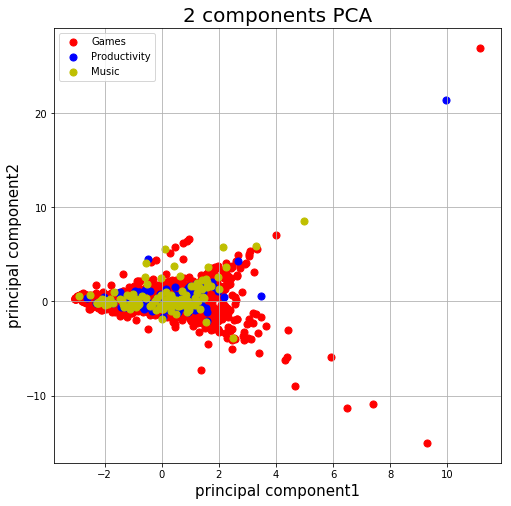

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component1', fontsize = 15)
ax.set_ylabel('principal component2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = ['Games', 'Productivity','Music']
colors = ['r', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['prime_genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# 4. K-means classification and find the best K value

In [64]:
Y = data[['user_rating']]
X = pca_x[['principal component1','principal component2']]

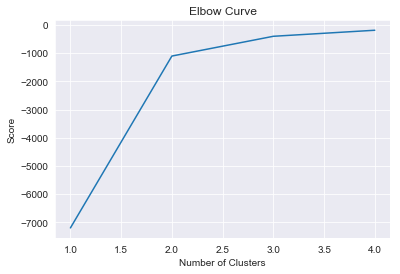

In [65]:
N = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in N]
#kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
#score
pl.plot(N,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
#from the Elbow Curve, we can see the best k value is 2

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


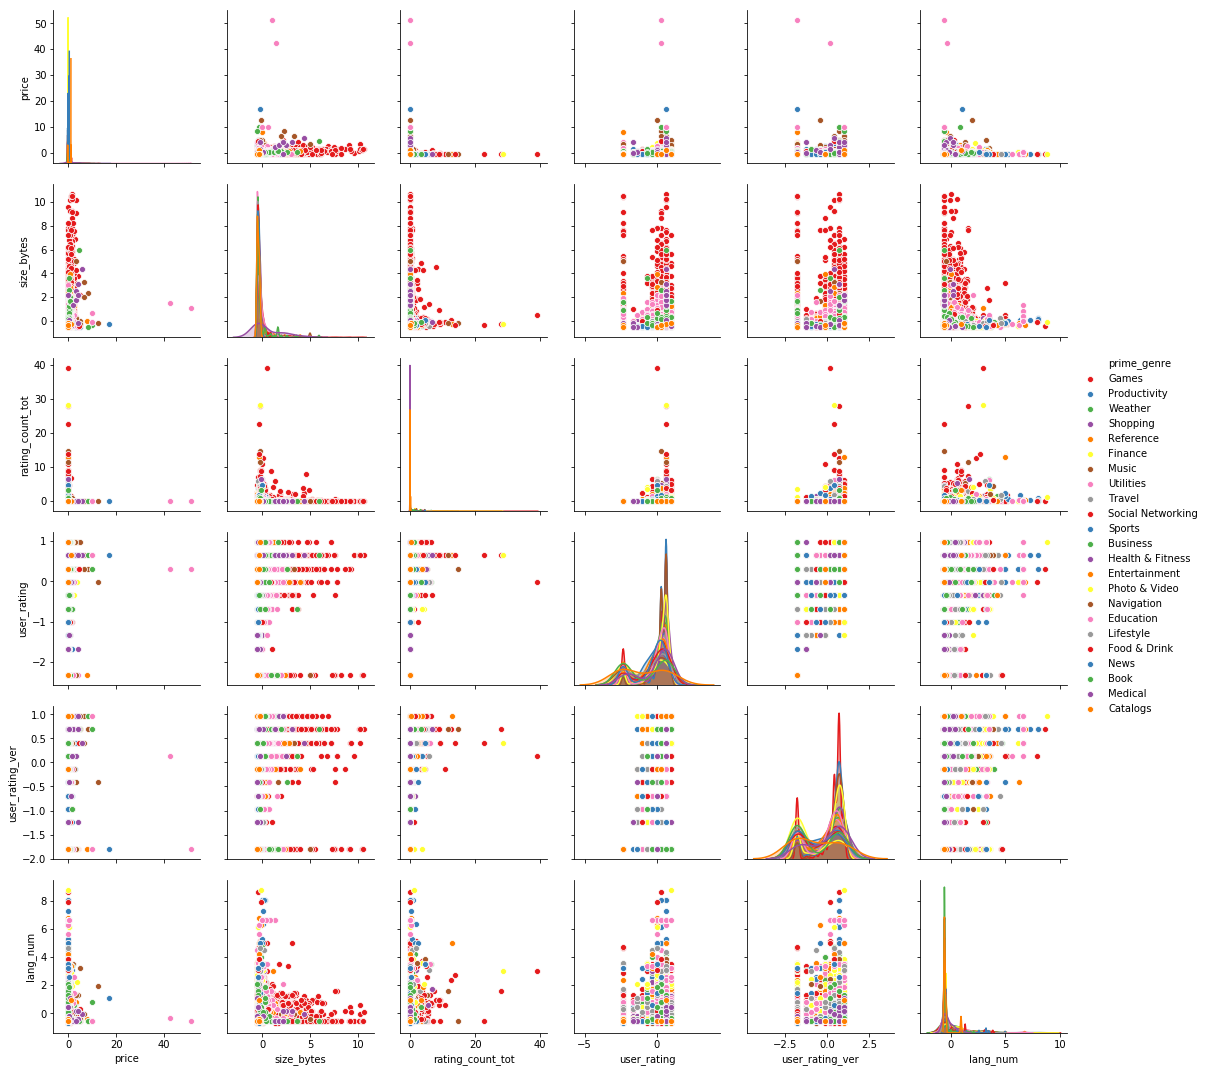

In [47]:
columns = data2[['price','size_bytes','rating_count_tot','user_rating','prime_genre','user_rating_ver','lang_num']]
sns.pairplot(data =columns, dropna=True,hue ='prime_genre', palette= 'Set1')

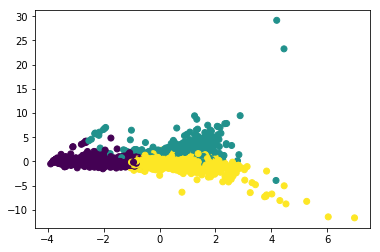

In [48]:
kmeans_model = KMeans(n_clusters=3)
columns = data._get_numeric_data().dropna(axis=1)
kmeans_model.fit(columns)
labels = kmeans_model.labels_
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

# Exploring features

1. Analyze Relations with price

In [49]:
#(1)BASIC info of top 10 user_rating 
ratings = apple_data.loc[:,["track_name","prime_genre","user_rating",'price']]
ratings = ratings.sort_values(by = ["price"],ascending=False)
ratings.head(10)

,track_name,prime_genre,user_rating,price
1479,LAMP Words For Life,Education,4.0,299.99
115,Proloquo2Go - Symbol-based AAC,Education,4.0,249.99
2568,KNFB Reader,Productivity,4.5,99.99
162,NAVIGON Europe,Navigation,3.5,74.99
3238,FineScanner Pro - PDF Document Scanner App + OCR,Business,4.0,59.99
1136,Articulation Station Pro,Education,4.5,59.99
2181,Articulation Test Center Pro,Education,4.5,59.99
5340,VPN Pro | Lifetime Proxy & Best VPN by Betternet,Business,4.5,49.99
1688,Cubasis 2 - Mobile Music Creation System,Music,4.0,49.99
778,プチ・ロワイヤル仏和辞典（第4版）・和仏辞典（第3版）,Reference,0.0,47.99


2. Analyze prime_genre vs cont_rating 

In [50]:
#(3).Find content ratings of different Apps Genre

In [51]:
apple_data.copy().head()
# Remove the '+' from the rating and change dtype to int
apple_data['cont_rating'] = (apple_data['cont_rating']
                    .apply   (lambda x: x.replace('+',''))
                    .astype  (int))

In [52]:
#(4).App Genre vs Content rating
#apple_data['cont_rating'] = apple_data.apply(lambda row: row['cont_rating'][:-1], axis=1)
#apple_data['cont_rating'] = pd.to_numeric(apple_data['cont_rating'])

# Calculating the mean of cont_ratings for the different app_genre categories
avg_cont_ratings = apple_data.groupby('prime_genre')['cont_rating'].mean().reset_index().sort_values(by = ['cont_rating'])
avg_cont_ratings.tail() 

,prime_genre,cont_rating
9,Lifestyle,8.361111
4,Entertainment,8.407477
10,Medical,11.130435
18,Social Networking,11.341317
13,News,11.413333


Text(0.5, 1.0, 'App Categories vs Content Rating')

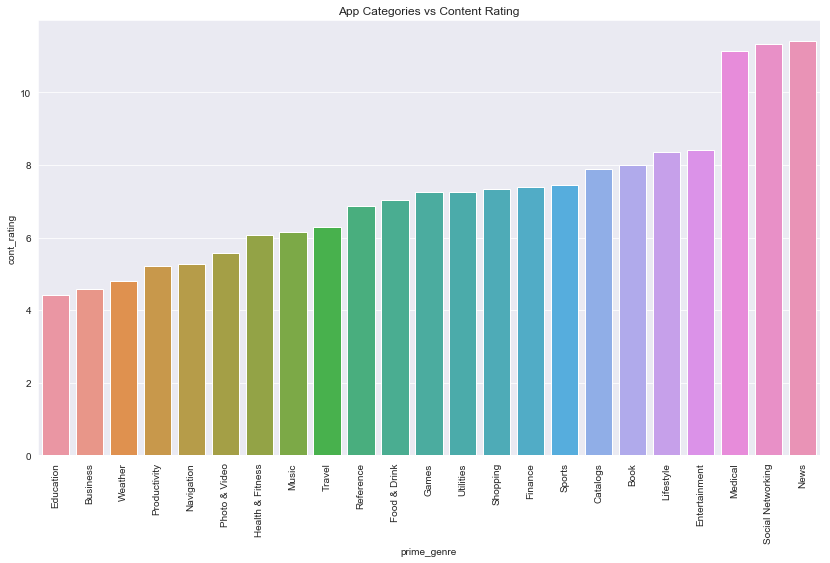

In [53]:
# 5.Plotting cont_rating vs prime_genre
plt.figure(figsize = (14, 8), facecolor = None)
sns.set_style("darkgrid")
plot1 = sns.barplot(x = "prime_genre", y = "cont_rating", data = avg_cont_ratings)

plot1.set_xticklabels(avg_cont_ratings['prime_genre'], rotation = 90, ha = "center")
plot1.set(xlabel = 'prime_genre',ylabel ='cont_rating')
plot1.set_title('App Categories vs Content Rating')

In [54]:
avg_user_ratings = apple_data.groupby('prime_genre')['user_rating'].mean().reset_index().sort_values(by = ['user_rating'])
avg_user_ratings.tail()

,prime_genre,user_rating
8,Health & Fitness,3.700000
1,Business,3.745614
14,Photo & Video,3.800860
11,Music,3.978261
15,Productivity,4.005618


Text(0.5, 1.0, 'App Categories vs User Rating')

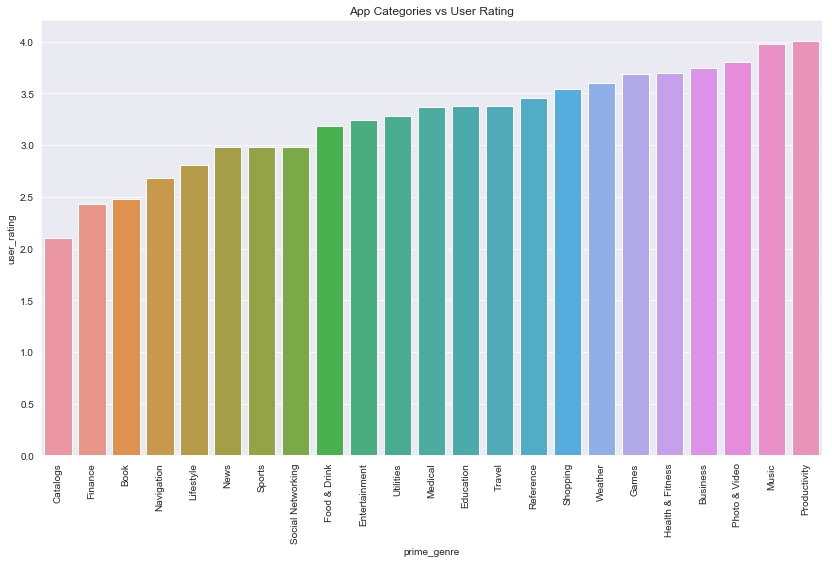

In [55]:
# 5.Plotting user_rating vs prime_genre
plt.figure(figsize = (14, 8), facecolor = None)
sns.set_style("darkgrid")
plot1 = sns.barplot(x = "prime_genre", y = "user_rating", data = avg_user_ratings)

plot1.set_xticklabels(avg_user_ratings['prime_genre'], rotation = 90, ha = "center")
plot1.set(xlabel = 'prime_genre',ylabel ='user_rating')
plot1.set_title('App Categories vs User Rating')

In [56]:
productivity = apple_data[(apple_data["prime_genre"]=="productivity")]
#productivity = productivity.sort_values(by ='user_rating',ascending=False)
print(productivity)

Empty DataFrame
Columns: [Unnamed: 0, id, track_name, size_bytes, currency, price, rating_count_tot, rating_count_ver, user_rating, user_rating_ver, ver, cont_rating, prime_genre, sup_devices.num, ipadSc_urls.num, lang.num, vpp_lic]
Index: []


In [57]:
productivity = apple_data[apple_data["prime_genre"]=='Productivity']
                          
#productivity = productivity.sort_values(by = ["user_rating"],ascending=False)
productivity.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity,37,5,23,1
27,31,288113403,iTranslate - Language Translator & Dictionary,287933440,USD,0.00,123215,25,3.5,5.0,10.5.4,4,Productivity,37,5,23,1
126,141,310636441,"iStudiez Pro – Homework, Schedule, Grades",55815168,USD,2.99,7308,15,4.0,4.5,1.9.1,4,Productivity,37,5,30,1
132,151,311785642,AutoScout24 - mobile used & new car market,141136896,USD,0.00,220,2,4.5,5.0,9.1.10,4,Productivity,37,5,13,1
134,153,312220102,MindNode – Delightful Mind Mapping,52294656,USD,9.99,1296,4,4.0,5.0,4.5.3,4,Productivity,37,4,13,1
184,209,325962257,My Measures PRO,79882240,USD,7.99,1701,35,4.0,4.5,6.06,4,Productivity,37,5,21,1
194,222,327630330,Dropbox,180804608,USD,0.00,49578,16,3.5,3.0,50.2,4,Productivity,37,5,20,1
242,275,336683524,iFiles,47323136,USD,0.99,1842,23,3.5,2.5,1.17.11,4,Productivity,38,1,1,1
267,301,341691394,Refills Calendar - Scheduler - Note,35864576,USD,9.99,196,3,4.0,5.0,4.0.1,4,Productivity,38,5,2,1
311,350,352000376,Shift Worker,7344128,USD,1.99,348,33,4.0,4.0,1.5.4,4,Productivity,40,0,1,0


In [58]:
apple_data["prime_genre"].head(10)

0           Games
1    Productivity
2         Weather
3        Shopping
4       Reference
5           Games
6         Finance
7           Music
8       Utilities
9           Games
Name: prime_genre, dtype: object

# 9. Analyze size

#1.What kind of genra usually have big size apps?

In [59]:
genre_size = apple_data.loc[:,["prime_genre","size_bytes"]]
genre_size = genre_size.groupby("prime_genre").mean()
new_index = (genre_size["size_bytes"].sort_values(ascending=False)).index.values
genre_size = genre_size.reindex(new_index)
genre_size.head()

,size_bytes
prime_genre,
Medical,3.763890e+08
Games,2.836583e+08
Education,1.804242e+08
Book,1.788206e+08
Reference,1.551627e+08


# 10. Analyze price

free_games=free_games.sort_values(by ='user_rating',ascending=False) 

In [60]:
paid_games = apple_data[(apple_data["prime_genre"]=="Games") & (apple_data["price"]>0) & (apple_data["user_rating"]>=2.5)]
top_rating_paid_games = paid_games.sort_values(by ='user_rating',ascending=False)
paid_games.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4,Games,38,5,10,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4,Games,47,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4,Games,38,0,10,1
10,11,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4,Games,38,4,11,1
11,12,284815117,SCRABBLE Premium,227547136,USD,7.99,105776,166,3.5,2.5,5.19.0,4,Games,37,0,6,1


In [61]:
free_games = apple_data[(apple_data["prime_genre"]=="Games") & (apple_data["price"]==0) & (apple_data["user_rating"]>=2.5)]
top_rating_free_games = free_games.sort_values(by ='user_rating',ascending=False)
top_rating_free_games.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7196,11097,1188375727,Escape the Sweet Shop Series,90898432,USD,0.0,3,3,5.0,5.0,1.0,4,Games,40,0,2,1
2177,2537,698255242,Geometry Dash Lite,69076992,USD,0.0,370370,2650,5.0,4.5,2.11,4,Games,37,4,1,1
6276,8996,1121157685,Buffalo Slots - Royal Casino Fun Slot Machines!,81576960,USD,0.0,3153,0,5.0,0.0,1.2.2,12,Games,40,5,1,1
6274,8990,1120936238,Cafe Story - Play Cooking & Farming Game,116981760,USD,0.0,1498,79,5.0,5.0,1.1.55,4,Games,38,5,2,1
3466,4203,966802035,LINE FIGHTERS,136356864,USD,0.0,1,1,5.0,5.0,1.0.7,4,Games,38,5,4,1


# Classification

(1)KNN CLASSIFIER

In [148]:
# modules libraries might need.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
import sys

index_a = apple_data.query('user_rating>=4').index
index_b = apple_data.query('user_rating >2 & user_rating < 4').index
index_c = apple_data.query('user_rating <=2').index
apple_data.user_rating[index_a] = "Good"
apple_data.user_rating[index_b] = "OK"
apple_data.user_rating[index_c] = "Bad"

#another method:
k1 = df['user_rating'] >=4
k2 = df['user_rating'].between(2,4)
k3 = df['user_rating'] <=2
df.user_rating[k1] = "Good"
df.user_rating[k2] = "OK"
df.user_rating[k3] = "Bad"            

In [149]:
df_knn = apple_data.drop(columns = ['Unnamed: 0','id','currency','track_name','ver','prime_genre'])

In [150]:
df_knn.copy().head()
# Remove the '+' from the rating and change dtype to int
df_knn['cont_rating'] = (df_knn['cont_rating']
                    .apply   (lambda x: x.replace('+', ''))
                    .astype  (int))

In [151]:
df_knn['user_rating'] = np.where(df_knn['user_rating'] >= 3.0,'Good','Bad')

In [152]:
#Split the data into a training and testing set using the sklearn function train_test_split
                              
X_train, X_test, y_train, y_test = train_test_split(df_knn.drop('user_rating',axis=1), df_knn['user_rating'], test_size=.25, random_state=42)

In [153]:
n_samples_train, n_features = X_train.shape
n_samples_test, _ = X_test.shape
n_classes = len(np.unique(y_train))
print("Number of samples in training set: %d ( %d Good, %d Bad)" % (n_samples_train,np.sum(y_train=='Good'),np.sum(y_train=='Bad')))
print("Number of samples in the testing set:  %d ( %d Good, %d Bad)" % (n_samples_test,np.sum(y_test=='Good'),np.sum(y_test=='Bad')))
print("Number of features: " +  str(n_features))
print("Number of classes: " + str(n_classes))
print("User rating for apps for class labels: " + str(np.unique(y_train)))   

Number of samples in training set: 5397 ( 4418 Good, 979 Bad)
Number of samples in the testing set:  1800 ( 1448 Good, 352 Bad)
Number of features: 10
Number of classes: 2
User rating for apps for class labels: ['Bad' 'Good']


In [168]:
# Define the classificaiton model - KNeighborsClassifier() classifer.
# Train the model using the training sets
df_knn = KNeighborsClassifier(n_neighbors =2)
df_knn.fit(X_train, y_train)
#Predict Output
y_pred = df_knn.predict(X_test)  
y_true = y_test

In [181]:
from sklearn.model_selection import cross_validate
df_knn = KNeighborsClassifier(n_neighbors = 2)
cv_results = cross_validate(df_knn, X_train, y_train, cv=20, scoring='roc_auc',return_train_score=False)

In [186]:
cv_results

{'fit_time': array([0.0099678 , 0.00806117, 0.00980711]),
 'score_time': array([0.01182508, 0.014153  , 0.0141499 ]),
 'test_score': array([0.54972793, 0.55869037, 0.5783063 ])}

In [164]:
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import cross_validate

In [183]:
score, permutation_scores, pvalue = permutation_test_score(
    df_knn, X_train, y_train, scoring="accuracy", cv=20, n_permutations=100, n_jobs=1)


In [184]:
print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score 0.6308833722753437 (pvalue : 0.009900990099009901)


In [185]:
cv_results = cross_validate(model, X_train, y_train, cv=3, scoring='roc_auc',return_train_score=False)
cv_results

{'fit_time': array([0.0099678 , 0.00806117, 0.00980711]),
 'score_time': array([0.01182508, 0.014153  , 0.0141499 ]),
 'test_score': array([0.54972793, 0.55869037, 0.5783063 ])}

In [86]:
# Looking for optimum value of n_neighbours for the dataset.
for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train);
    print('For n = {}, Test = {}, Train = {}'.format(i,knn.score(X_train, y_train),knn.score(X_test, y_test)))

For n = 1, Test = 1.0, Train = 0.7061111111111111
For n = 2, Test = 0.8588104502501389, Train = 0.6355555555555555
For n = 3, Test = 0.858254585881045, Train = 0.76
For n = 4, Test = 0.8347229942560682, Train = 0.7266666666666667


In [87]:
accuracy = knn.score(X_test,y_test)
print(accuracy)

0.7266666666666667


In [88]:
# confusion_matrix  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import confusion_matrix

In [89]:
print("\n This is the confusion matrix")
cnf_mx = metrics.confusion_matrix(y_true, y_pred)
print(cnf_mx)
# Rows are y_true, Cols as y_false
print("\n This is the normalized confusion matrix.")
cnf_mx_joint = cnf_mx.astype('float')/ cnf_mx.sum()
print(cnf_mx_joint)
target_names = ['Higt','Low']
print(metrics.classification_report(y_true,y_pred,target_names = target_names))


 This is the confusion matrix
[[  30  322]
 [  82 1366]]

 This is the normalized confusion matrix.
[[0.01666667 0.17888889]
 [0.04555556 0.75888889]]
              precision    recall  f1-score   support

        Higt       0.27      0.09      0.13       352
         Low       0.81      0.94      0.87      1448

   micro avg       0.78      0.78      0.78      1800
   macro avg       0.54      0.51      0.50      1800
weighted avg       0.70      0.78      0.73      1800



In [90]:
# Precision.
precision = metrics.precision_score(y_true,y_pred, pos_label=1,average ='macro')  
print("Precision (for class y=0 as positive class): %.3f" % precision)

# Recall
recall = metrics.recall_score(y_true, y_pred, pos_label=1,average ='macro')
print("1. Recall/TPR (for class y=0 as positive class): %.3f" % recall)

# f1_score
f1_score = metrics.f1_score(y_true,y_pred, pos_label=1,average ='macro')
print("1: F1_score (for class y=0 as positive class): %.3f" % f1_score )

Precision (for class y=0 as positive class): 0.539
1. Recall/TPR (for class y=0 as positive class): 0.514
1: F1_score (for class y=0 as positive class): 0.500


The results show that our KNN algorithm was able to classify all the records in the test set with 77% accuracy, which is great. Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

In [91]:
error = []
# Calculating error for K values between 1 and 5
for i in range(1, 5):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
error

[0.29388888888888887, 0.36444444444444446, 0.24, 0.2733333333333333]

Text(0, 0.5, 'Mean Error')

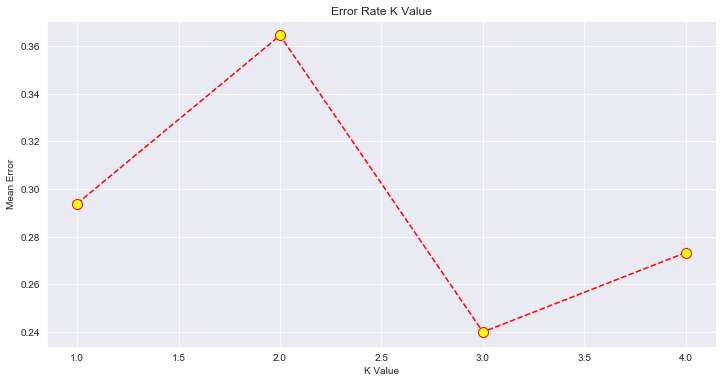

In [92]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 5), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

From the output we can see that the mean error is zero when the value of the K is 2. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.


In [93]:
df_svm = apple_data.drop(columns = ['Unnamed: 0','id','currency','track_name','ver','prime_genre'])
df_svm.copy().head()
# Remove the '+' from the rating and change dtype to int
df_svm['cont_rating'] = (df_svm['cont_rating']
                    .apply   (lambda x: x.replace('+',''))
                    .astype  (int))
df_svm['user_rating'] = np.where(df_svm['user_rating'] >= 3.5,'Good','Bad')
df_svm.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,Good,4.5,4,38,5,10,1
1,158578688,0.00,161065,26,Good,3.5,4,37,5,23,1
2,100524032,0.00,188583,2822,Good,4.5,4,37,5,3,1
3,128512000,0.00,262241,649,Good,4.5,12,37,5,9,1
4,92774400,0.00,985920,5320,Good,5.0,4,37,5,45,1


In [94]:
# SVM classifier 
# Try different values for parameter C.
# Try different values of parameter kernel : 'linear', 'poly', 'rbf'
# Try different values for parameter gamma (for supported kernels).
# Check the the classification boundary changes for different gammas. 
from sklearn import svm
#Split the data into a training and testing set using the sklearn function train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_svm.drop('user_rating',axis=1), df_svm['user_rating'], test_size=.25, random_state=42)

In [95]:
model = svm.SVC(C=5, kernel='rbf',probability=False,gamma=15)
model = svm.SVC(C=4, kernel='rbf',probability=False,gamma=15)
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         Bad       0.27      0.09      0.13       352
        Good       0.81      0.94      0.87      1448

   micro avg       0.78      0.78      0.78      1800
   macro avg       0.54      0.51      0.50      1800
weighted avg       0.70      0.78      0.73      1800



In [96]:
# Train the model using the training sets
model.fit(X_train,y_train)
#Predict Output
y_pred = model.predict(X_test)  
y_true = y_test

In [97]:
acc = metrics.accuracy_score(y_true, y_pred)
print("Accuracy: %.3f" % acc)
model = svm.SVC(C = 5, kernel = 'rbf', probability = False, gamma=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\n This is the normalized confusion matrix")
target_names = ['Higt','Low']
print(metrics.classification_report(y_true,y_pred,target_names = target_names))

Accuracy: 0.749

 This is the normalized confusion matrix
              precision    recall  f1-score   support

        Higt       1.00      0.00      0.00       452
         Low       0.75      1.00      0.86      1348

   micro avg       0.75      0.75      0.75      1800
   macro avg       0.87      0.50      0.43      1800
weighted avg       0.81      0.75      0.64      1800

